<a href="https://colab.research.google.com/github/sanaullahgithub/Final_Project_kidney_disease_Classification/blob/main/Kidney_disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

# Importing Libraries to work

In [4]:
import itertools
import numpy as np                         # Data Manipulation
import pandas as pd                        # Data Manipulation
import seaborn as sns                      # For Plotting
import matplotlib.pyplot as plt            # For Plotting
from sklearn.impute import SimpleImputer   # Predict Missing Values to Fill Nulls in the Dataset

# Data Preprocessing

**Combining Features and Target Variable**

In [5]:
# Combine features and target
data_combined = pd.concat([X, y], axis=1)

# Display the combined DataFrame
print(data_combined.head())

    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1    NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]


# Data Information

In [6]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

**Data Statistics**

In [7]:
data_combined.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


# Checking Null Values

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


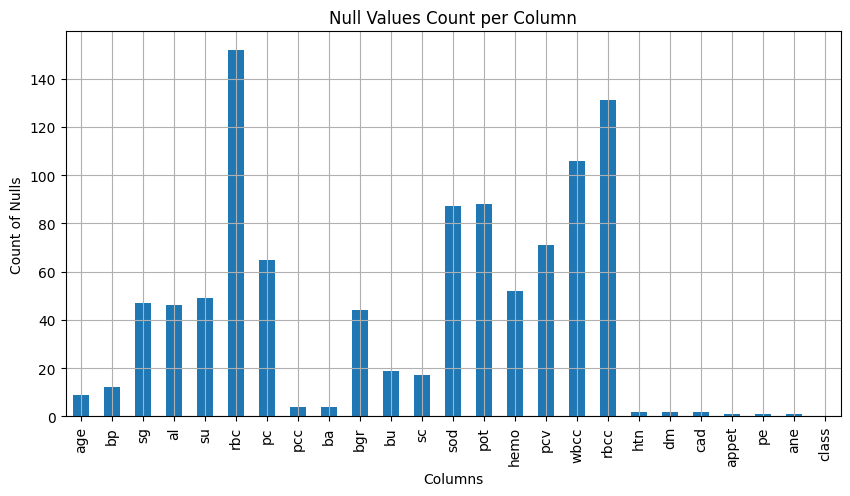

In [8]:
# Check for null values in the dataset
null_counts = data_combined.isnull().sum()

# Display columns with null values and their counts
print(null_counts[null_counts > 0])
plt.figure(figsize=(10, 5))
null_counts.plot(kind='bar')
plt.title("Null Values Count per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Nulls")
plt.grid()

# Deal with the NUll Values

In [10]:
# Separate features into numerical and categorical
numerical_cols = data_combined.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_combined.select_dtypes(include=['object', 'category']).columns

# Impute numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
data_combined[numerical_cols] = num_imputer.fit_transform(data_combined[numerical_cols])

# Impute categorical columns with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data_combined[categorical_cols] = cat_imputer.fit_transform(data_combined[categorical_cols])

# Verify null values have been handled
print("Null values remaining:")
print(data_combined.isnull().sum().sum())  # Should print 0 if all nulls are handled

Null values remaining:
0


# Unique Values in Each Column

In [11]:
# Identify categorical columns
categorical_columns = data_combined.select_dtypes(include=['object', 'category']).columns

# Check unique values in each categorical column
for col in categorical_columns:
    unique_values = data_combined[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}\n")

Column: rbc
Unique Values (2): ['normal' 'abnormal']

Column: pc
Unique Values (2): ['normal' 'abnormal']

Column: pcc
Unique Values (2): ['notpresent' 'present']

Column: ba
Unique Values (2): ['notpresent' 'present']

Column: htn
Unique Values (2): ['yes' 'no']

Column: dm
Unique Values (3): ['yes' 'no' '\tno']

Column: cad
Unique Values (2): ['no' 'yes']

Column: appet
Unique Values (2): ['good' 'poor']

Column: pe
Unique Values (2): ['no' 'yes']

Column: ane
Unique Values (2): ['no' 'yes']

Column: class
Unique Values (3): ['ckd' 'ckd\t' 'notckd']



# Data Cleaning

In [13]:
# Clean the 'dm' column
data_combined['dm'] = data_combined['dm'].str.strip()  # Remove leading/trailing whitespaces
data_combined['dm'] = data_combined['dm'].replace({'\tno': 'no'})  # Replace '\tno' with 'no'

# Clean the class column
data_combined['class'] = data_combined['class'].str.strip()  # Remove leading/trailing whitespaces
data_combined['class'] = data_combined['class'].replace({'ckd\t': 'ckd'})  # Replace 'ckd\t' with 'ckd'

# Verify the fixes
print("Unique values in 'dm':", data_combined['dm'].unique())
print("Unique values in 'class':", data_combined['class'].unique())

Unique values in 'dm': ['yes' 'no']
Unique values in 'class': ['ckd' 'notckd']


# EDA

# Feature Selection

# Model Traning